# ¿Cómo funciona la suspensión de un auto?
 

<div>
<img style="float: left; margin: 0px 0px 15px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Packard_wishbone_front_suspension_%28Autocar_Handbook%2C_13th_ed%2C_1935%29.jpg/414px-Packard_wishbone_front_suspension_%28Autocar_Handbook%2C_13th_ed%2C_1935%29.jpg" width="150px" height="50px" />

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/df/Radaufhängung_Renault.JPG" width="150px" height="100px" />

</div>
 
> Una primer aproximación al modelo de la suspensión de un automovil es considerar el *oscilador armónico amortiguado*. 

<img style="float: center; margin: 0px 0px 15px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/4/45/Mass_spring_damper.svg" width="300px" height="100px" />

Referencia: 
- https://es.wikipedia.org/wiki/Oscilador_arm%C3%B3nico#Oscilador_arm.C3.B3nico_amortiguado

Un **modelo** que describe el comportamiento del sistema mecánico anterior es

\begin{equation}
m\frac{d^2 x}{dt^2}=-c\frac{dx}{dt}-kx
\end{equation}

donde $c$ es la constante de amortiguamiento y $k$ es la constante de elasticidad. <font color=red> Revisar modelado </font>

Documentación de los paquetes que utilizaremos hoy.
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
- https://docs.scipy.org/doc/scipy/reference/index.html

___
En `python` existe una función llamada <font color = blue>_odeint_</font> del paquete <font color = blue>_integrate_</font> de la libreria <font color = blue>_scipy_</font>, que permite integrar sistemas vectoriales de primer orden, del tipo

\begin{equation}
\frac{d\boldsymbol{y}}{dt} = \boldsymbol{f}(\boldsymbol{y},t); \qquad \text{ con }\quad \boldsymbol{y}\in\mathbb{R}^n,\quad \boldsymbol{f}:\mathbb{R}^n\times\mathbb{R}_{+}\to\mathbb{R}^n
\end{equation}

con condiciones iniciales $\boldsymbol{y}(0) = \boldsymbol{y}_{0}$. Notar que <font color=red> $\boldsymbol{y}$ representa un vector de $n$ componentes</font>.

Ahora, si nos fijamos bien, el modelo del *oscilador armónico amortiguado* que obtuvimos es una ecuación diferencial ordinaria (EDO) de segundo orden. No hay problema. La podemos convertir en un sistema de ecuaciones de primer orden de la siguiente manera:

1. Seleccionamos el vector $\boldsymbol{y}=\left[y_1\quad y_2\right]^T$, con $y_1=x$ y $y_2=\frac{dx}{dt}$.
2. Notamos que $\frac{dy_1}{dt}=\frac{dx}{dt}=y_2$ y $\frac{dy_2}{dt}=\frac{d^2x}{dt^2}=-\frac{c}{m}\frac{dx}{dt}-\frac{k}{m}x=-\frac{c}{m}y_2-\frac{k}{m}y_1$.
3. Entonces, el modelo de segundo orden lo podemos representar como el siguiente sistema vectorial de primer orden:

\begin{equation}
\frac{d\boldsymbol{y}}{dt}=\left[\begin{array}{c}\frac{dy_1}{dt} \\ \frac{dy_2}{dt}\end{array}\right]=\left[\begin{array}{c}y_2 \\ -\frac{k}{m}y_1-\frac{c}{m}y_2\end{array}\right]=\left[\begin{array}{cc}0 & 1 \\-\frac{k}{m} & -\frac{c}{m}\end{array}\right]\boldsymbol{y}.
\end{equation}

In [1]:
# Primero importamos todas las librerias, paquetes y/o funciones que vamos a utlizar
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

In [13]:
# Función f(y,t) que vamos a integrar
def amortiguado(y, t, k, m, c):
    y1 = y[0]
    y2 = y[1]
    return np.array([y2, 
                     -(k / m) * y1 - (c / m) * y2])

In [17]:
# Definimos los parámetros k, m y c
k, m, c = 3, 1, 0.5

# Condiciones iniciales
y0 = np.array([1, 1])

# Especificamos los puntos de tiempo donde queremos la solución
t = np.linspace(0, 30, 300)

In [18]:
# Solución numérica
y = odeint(func=amortiguado,
           y0=y0, 
           t=t,
           args=(k, m, c))

¿Cómo entrega odeint las soluciones?

In [19]:
# Averiguar la forma de solución
y.shape

(300, 2)

In [20]:
# Mostrar la solución 
y

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 1.08255354e+00,  6.44400045e-01],
       [ 1.12926028e+00,  2.87265734e-01],
       [ 1.14050185e+00, -6.08345277e-02],
       [ 1.11768327e+00, -3.90114960e-01],
       [ 1.06314152e+00, -6.91821494e-01],
       [ 9.80031347e-01, -9.58438604e-01],
       [ 8.72192532e-01, -1.18384948e+00],
       [ 7.44003548e-01, -1.36344733e+00],
       [ 6.00226559e-01, -1.49419684e+00],
       [ 4.45848722e-01, -1.57464647e+00],
       [ 2.85924657e-01, -1.60489362e+00],
       [ 1.25424603e-01, -1.58650595e+00],
       [-3.09074594e-02, -1.52240341e+00],
       [-1.78682133e-01, -1.41670627e+00],
       [-3.13976227e-01, -1.27455532e+00],
       [-4.33425216e-01, -1.10191089e+00],
       [-5.34294753e-01, -9.05337619e-01],
       [-6.14530179e-01, -6.91782064e-01],
       [-6.72783643e-01, -4.68349828e-01],
       [-7.08419119e-01, -2.42089037e-01],
       [-7.21496257e-01, -1.97860630e-02],
       [-7.12734597e-01,  1.92221059e-01],
       [-6.

- $y$ es una matriz de n filas y 2 columnas.
- La primer columna de $y$ corresponde a $y_1$.
- La segunda columna de $y$ corresponde a $y_2$.

¿Cómo extraemos los resultados $y_1$ y $y_2$ independientemente?

In [21]:
# Extraer y1 y y2
y1 = y[:, 0]
y2 = y[:, 1]

### Para hacer participativamente...
- Graficar en una misma ventana $y_1$ vs. $t$ y $y_2$ vs. $t$... ¿qué pueden observar?

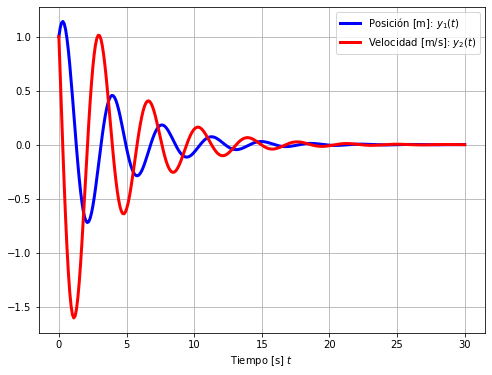

In [22]:
# Gráfica
plt.figure(figsize=(8,6))
plt.plot(t, y1, 'b', lw=3, label='Posición [m]: $y_1(t)$')
plt.plot(t, y2, 'r', lw=3, label='Velocidad [m/s]: $y_2(t)$')
plt.xlabel("Tiempo [s] $t$")
plt.legend(loc="best")
plt.grid()
plt.show()

- Graficar $y_2/\omega_0$ vs. $y_1$... ¿cómo se complementan estos gráficos? ¿conclusiones?

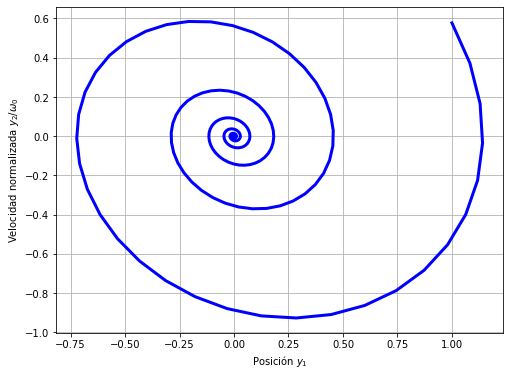

In [23]:
# Gráfica
omega0 = (k/m)**0.5

plt.figure(figsize=(8,6))
plt.plot(y1, y2/omega0, 'b', lw=3)
plt.xlabel("Posición $y_1$")
plt.ylabel("Velocidad normalizada $y_2/\omega_0$")
plt.grid()
plt.show()

## Dependiendo de los parámetros, 3 tipos de soluciones

Teníamos
\begin{equation}
m\frac{d^2 x}{dt^2} + c\frac{dx}{dt} + kx = 0
\end{equation}

si recordamos que $\omega_0 ^2 = \frac{k}{m}$ y definimos $\frac{c}{m}\equiv 2\Gamma$, tendremos

\begin{equation}
\frac{d^2 x}{dt^2} + 2\Gamma \frac{dx}{dt}+ \omega_0^2 x = 0
\end{equation}

<font color=blue>El comportamiento viene determinado por las raices de la ecuación característica. Ver en el tablero...</font>

### Subamortiguado

Si $\omega_0^2 > \Gamma^2$ se tiene movimiento oscilatorio *subamortiguado*. 

In [24]:
omega0 = (k/m)**0.5
Gamma = c/(2*m)

In [25]:
omega0**2, Gamma**2

(2.9999999999999996, 0.0625)

In [26]:
omega0**2 > Gamma**2

True

Entonces, el primer caso que ya habíamos presentado corresponde a movimiento amortiguado. 

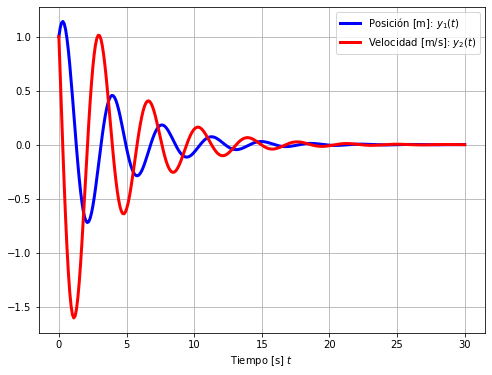

In [27]:
# Gráfica, de nuevo
plt.figure(figsize=(8,6))
plt.plot(t, y1, 'b', lw=3, label='Posición [m]: $y_1(t)$')
plt.plot(t, y2, 'r', lw=3, label='Velocidad [m/s]: $y_2(t)$')
plt.xlabel("Tiempo [s] $t$")
plt.legend(loc="best")
plt.grid()
plt.show()

In [99]:
# Función f(y,t) que vamos a integrar
def amortiguado(y, t, k, m, c):
    y1 = y[0]
    y2 = y[1]
    w0 = np.sqrt(k / m)
    f = np.sin(w0 * t)
    return np.array([y2, 
                     -(k / m) * y1 - (c / m) * y2 + f])

In [100]:
# Definimos los parámetros k, m y c
k, m, c = 3, 1, 0.5

# Condiciones iniciales
y0 = np.array([1, 1])

# Especificamos los puntos de tiempo donde queremos la solución
t = np.linspace(0, 30, 300)

In [101]:
# Solución numérica
y = odeint(func=amortiguado,
           y0=y0, 
           t=t,
           args=(k, m, c))

In [102]:
y1, y2 = y.T

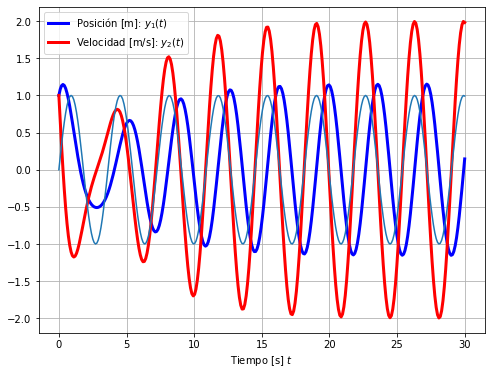

In [103]:
# Gráfica, de nuevo
plt.figure(figsize=(8,6))
plt.plot(t, y1, 'b', lw=3, label='Posición [m]: $y_1(t)$')
plt.plot(t, y2, 'r', lw=3, label='Velocidad [m/s]: $y_2(t)$')
plt.plot(t, 1 * np.sin((k / m)**0.5 * t))
plt.xlabel("Tiempo [s] $t$")
plt.legend(loc="best")
plt.grid()
plt.show()

### Sobreamortiguado

Si $\omega_0^2 < \Gamma^2$ se tiene movimiento oscilatorio *sobreamortiguado*. 

In [28]:
# Nuevas constantes 
k = .1 # Constante del muelle
m = 1.0   # Masa
c = 1 # Constante de amortiguación

Simular y graficar...

In [29]:
omega0 = np.sqrt(k/m)
Gamma = c/(2*m)

In [30]:
omega0**2, Gamma**2

(0.1, 0.25)

In [31]:
omega0**2<Gamma**2

True

In [32]:
# Simular
y = odeint(amortiguado, y0, t, args=(k,m,c))
y1s = y[:,0]
y2s = y[:,1]

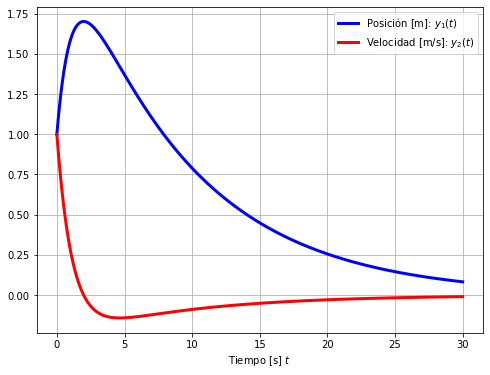

In [33]:
# Graficar
plt.figure(figsize=(8,6))
plt.plot(t, y1s, 'b', lw=3, label='Posición [m]: $y_1(t)$')
plt.plot(t, y2s, 'r', lw=3, label='Velocidad [m/s]: $y_2(t)$')
plt.xlabel("Tiempo [s] $t$")
plt.legend(loc="best")
plt.grid()
plt.show()

### Amortiguamiento crítico

Si $\omega_0^2 = \Gamma^2$ se tiene movimiento *críticamente amortiguado*. 

In [34]:
# Nuevas constantes
k = .0625 # Constante del muelle
m = 1.0   # Masa
c = .5 # Constante de amortiguación

Simular y graficar...

In [35]:
omega0 = np.sqrt(k/m)
Gamma = c/(2*m)

In [36]:
omega0**2, Gamma**2

(0.0625, 0.0625)

In [37]:
omega0**2 == Gamma**2

True

In [38]:
# Simular
y = odeint(amortiguado, y0, t, args=(k,m,c))
y1c = y[:,0]
y2c = y[:,1]

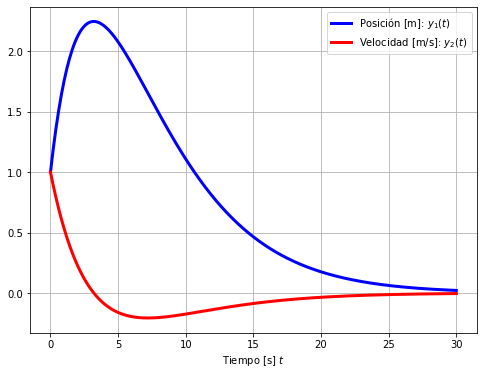

In [39]:
# Graficar
plt.figure(figsize=(8,6))
plt.plot(t, y1c, 'b', lw=3, label='Posición [m]: $y_1(t)$')
plt.plot(t, y2c, 'r', lw=3, label='Velocidad [m/s]: $y_2(t)$')
plt.xlabel("Tiempo [s] $t$")
plt.legend(loc="best")
plt.grid()
plt.show()

En resumen, se tiene entonces: 

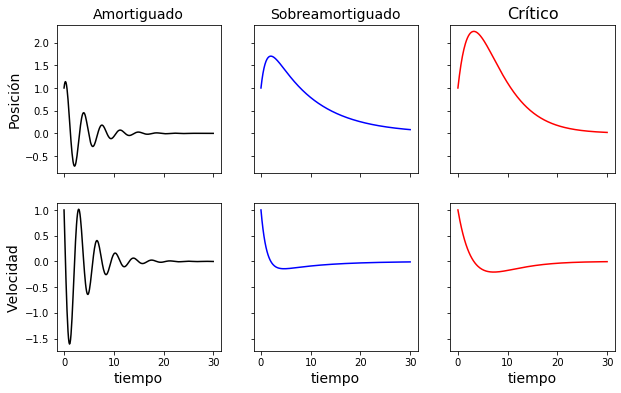

In [40]:
tt = t
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col',
                                                       sharey='row',figsize =(10,6))
ax1.plot(tt, y1, c = 'k') 
ax1.set_title('Amortiguado', fontsize = 14)
ax1.set_ylabel('Posición', fontsize = 14)
ax2.plot(tt, y1s, c = 'b') 
ax2.set_title('Sobreamortiguado', fontsize = 14)
ax3.plot(tt, y1c, c = 'r') 
ax3.set_title('Crítico', fontsize = 16)
ax4.plot(tt, y2, c = 'k')
ax4.set_ylabel('Velocidad', fontsize = 14)
ax4.set_xlabel('tiempo', fontsize = 14)
ax5.plot(tt, y2s, c = 'b')
ax5.set_xlabel('tiempo', fontsize = 14)
ax6.plot(tt, y2c, c = 'r')
ax6.set_xlabel('tiempo', fontsize = 14)
plt.show()

> **Tarea**. ¿Cómo se ve el espacio fase para los diferentes casos así como para diferentes condiciones iniciales?

> En un gráfico como el anterior, realizar gráficas del plano fase para los distintos movimientos y para cuatro conjuntos de condiciones iniciales distintas
- y0 = [1, 1]
- y0 = [1, -1]
- y0 = [-1, 1]
- y0 = [-1, -1]

Hacer lo anterior en un nuevo notebook de jupyter llamado Tarea7_ApellidoNombre.ipynb y subir en el espacio habilitado.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Lázaro Alonso. Modified by Esteban Jiménez Rodríguez.
</footer>